# Essentially Scratch Paper

#### This is a jupyter notebook that is not really used in the analysis

#### We are including this to show the thought process behind alot of our start we ran the Logistic regressions and SVM and everything here although it is messy and going to be hard to read. I though it would give nice insight to the beginnings of the project


In [58]:
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

import math

from sklearn.preprocessing import normalize
from sklearn.preprocessing import KBinsDiscretizer



In [59]:
df = pd.read_csv('newdata.csv')
df.columns
df = df[df['SPYRET'] != 'C']
df = df.fillna(0)
df['UP_DWN'] = df['UP_DWN'].map(lambda x: bool(x))

df['shrout'] = df['shrout'].pct_change()
df[['dailyreturns', 'dailyreturns_1', 'dailyreturns_2', 'dailyreturns_3', 'dailyreturns_4']] = df[['dailyreturns',
                                                                                                   'dailyreturns_1',
                                                                                                   'dailyreturns_2',
                                                                                                   'dailyreturns_3',
                                                                                                   'dailyreturns_4']] * 100
df['divfac'] = df['divfac'] * 1000
df['SDT_RET'] = df['SDT_RET'] * 10
df['squaredreturns'] = df['squaredreturns'].map(lambda x: math.sqrt(math.sqrt(x)))
df['squaredreturns'] = pd.to_numeric(df['squaredreturns'])
df['shrout'] = df['shrout'] * 10
df['shrout'] = df['shrout'].fillna(0)

In [60]:
df = df[['date_x', 'dailyreturns', 'chngcap', 'divfac', 'spread',
    'shrout', 'SDT_RET', 'Mkt-RF', 'SMB', 'HML', 'RMW', 'CMA', 'RF',
    'SPYRET', 'dailyreturns_1', 'dailyreturns_2',
    'dailyreturns_3', 'dailyreturns_4', 'pastreturns', 'squaredreturns',
    'TDRATE',
    'Bank Total Assets', 'Bank Deposits', 'UP_DWN', 'TMW_SPYRET']]

In [61]:
df['date_x'] = pd.to_datetime(df['date_x'])

In [62]:
df2 = df[df['date_x'] >= '2015-01-01']

In [76]:
features_cols = ['dailyreturns', 'chngcap', 'divfac', 'spread',
                 'shrout', 'SDT_RET', 'Mkt-RF', 'SMB', 'HML', 'RMW', 'CMA', 'RF',
                 'SPYRET', 'dailyreturns_1', 'dailyreturns_2',
                 'dailyreturns_3', 'dailyreturns_4', 'pastreturns', 'squaredreturns',
                 'TDRATE',
                 'Bank Total Assets', 'Bank Deposits']
X = df[features_cols]
y = df.UP_DWN

In [64]:
X

,dailyreturns,chngcap,divfac,spread,shrout,SDT_RET,Mkt-RF,SMB,HML,RMW,...,SPYRET,dailyreturns_1,dailyreturns_2,dailyreturns_3,dailyreturns_4,pastreturns,squaredreturns,TDRATE,Bank Total Assets,Bank Deposits
0,-0.301905,-0.004191,0.36981,0.658750,0.000000,0.097168,-0.31,0.01,0.13,-0.35,...,-0.017964,0.000000,0.000000,0.000000,0.000000,0.000000,0.054946,70.75,0.205243,0.194443
1,0.477837,0.006434,0.00000,0.823750,0.013633,0.128429,0.38,-0.46,0.05,-0.06,...,0.006098,-0.301905,0.000000,0.000000,0.000000,0.000000,0.069126,70.96,0.205243,0.194443
2,0.200276,0.000511,0.00000,0.725000,0.012841,0.108095,0.22,0.19,0.08,0.10,...,0.024242,0.477837,-0.301905,0.000000,0.000000,0.000000,0.044752,53.32,0.205243,0.194443
3,0.196820,0.002154,0.06043,0.665000,0.000000,0.093782,0.23,0.16,-0.07,0.09,...,0.047337,0.200276,0.477837,-0.301905,-0.301905,0.000542,0.044364,70.62,0.205243,0.194443
4,1.151027,0.012345,0.00000,0.778750,-0.026421,0.113471,0.92,-0.37,-0.19,0.29,...,0.107345,0.196820,0.200276,0.477837,0.477837,0.005008,0.107286,0.00,0.205243,0.194443
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9237,0.084344,-0.001125,0.00000,27.699945,0.000026,0.153242,0.10,0.83,2.03,0.29,...,0.000899,-0.322163,-0.419879,-0.053225,-0.053225,-0.001528,0.029042,0.09,0.000000,0.000000
9238,0.196901,0.002334,0.10427,44.291331,0.000083,0.161858,0.21,-0.43,-0.18,0.23,...,0.003890,0.084344,-0.322163,-0.419879,-0.419879,-0.001761,0.044374,0.09,0.000000,0.000000
9239,0.441875,0.011177,0.00000,45.152603,0.078998,0.126154,0.46,-0.67,0.34,1.39,...,0.008591,0.196901,0.084344,-0.322163,-0.322163,0.000158,0.066474,0.09,0.000000,0.000000
9240,0.107830,-0.000152,0.00000,33.126933,0.031321,0.112803,-0.40,-1.42,0.23,0.75,...,-0.001908,0.441875,0.196901,0.084344,0.084344,0.001831,0.032837,0.09,0.000000,0.000000


In [65]:
import numpy as np
from sklearn import svm
from sklearn import metrics
from sklearn.decomposition import PCA
import statsmodels.api as sm

In [72]:
X = df[features_cols]
y = df.UP_DWN

est = KBinsDiscretizer(n_bins=[8]*22, encode='ordinal').fit(X)
X = est.transform(X)

X_train = pd.DataFrame(X).head(7500)
X_test = pd.DataFrame(X).tail(-7500)
y_train = pd.DataFrame(y).head(7500)
y_test = pd.DataFrame(y).tail(-7500)

clf = svm.SVC()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
(metrics.accuracy_score(y_test, y_pred))


/Users/garrettsooter/opt/anaconda3/lib/python3.8/site-packages/sklearn/preprocessing/_discretization.py:220: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 2 are removed. Consider decreasing the number of bins.
  warnings.warn('Bins whose width are too small (i.e., <= '
/Users/garrettsooter/opt/anaconda3/lib/python3.8/site-packages/sklearn/preprocessing/_discretization.py:220: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 4 are removed. Consider decreasing the number of bins.
  warnings.warn('Bins whose width are too small (i.e., <= '
/Users/garrettsooter/opt/anaconda3/lib/python3.8/site-packages/sklearn/preprocessing/_discretization.py:220: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 11 are removed. Consider decreasing the number of bins.
  warnings.warn('Bins whose width are too small (i.e., <= '
/Users/garrettsooter/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarni

0.5427914991384262

In [73]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[151, 621],
       [175, 794]])

In [74]:
y_pred

array([ True,  True,  True, ...,  True,  True,  True])

In [79]:
X = pd.DataFrame(X).tail(-7500)

In [80]:
X['Prediction'] = y_pred

In [83]:
X['Prediction'] = X['Prediction'] * 1

In [91]:
X['SPYRET'] = X['SPYRET'].map(lambda x: float(x))

In [92]:
X['returns'] = X['Prediction'] * X['SPYRET']

In [93]:
X['Prediction']

7501    1
7502    1
7503    1
7504    1
7505    0
       ..
9237    1
9238    0
9239    1
9240    1
9241    1
Name: Prediction, Length: 1741, dtype: int64

In [96]:
X['returns'].mean()/X['returns'].std()

0.04050045225287682

<AxesSubplot:>

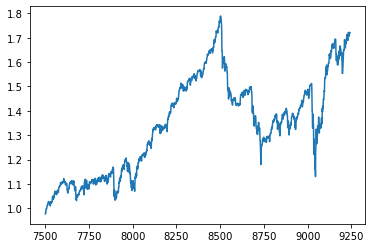

In [100]:
(X['returns'] + 1).cumprod().plot()

In [98]:
1741/252

6.908730158730159

In [32]:
X_train,X_test,y_train,y_test=train_test_split(X_normalized,y,test_size=0.25,random_state=0)

In [31]:
X_normalized = normalize(X, norm='l2')

In [42]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

In [0]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

In [38]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)
logreg = LogisticRegression(max_iter= 2000)
logreg.fit(X_train,y_train)
y_pred=logreg.predict(X_test)

/Users/garrettsooter/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [43]:
pd.DataFrame(X).to_csv('x.csv', index = False)
pd.DataFrame(y).to_csv('y.csv', index = False)

In [44]:
pd.DataFrame(y)

,UP_DWN
0,True
1,True
2,True
3,True
4,True
...,...
9237,True
9238,True
9239,False
9240,True


In [24]:
X

array([[2., 2., 5., ..., 8., 9., 9.],
       [6., 7., 0., ..., 8., 9., 9.],
       [5., 4., 0., ..., 7., 9., 9.],
       ...,
       [6., 8., 0., ..., 0., 2., 2.],
       [5., 4., 0., ..., 0., 2., 2.],
       [5., 4., 0., ..., 0., 2., 2.]])

In [ ]:
pd.DataFrame(X).to_csv('Xfull', index = False)
pd.DataFrame(y).to_csv('yfull', index = False)

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
from tensorflow.python.keras import Sequential
from tensorflow.python.keras.layers import Dense
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense

In [ ]:
clf = Sequential()
clf.add(Dense(units = 128, kernel_initializer = 'uniform', activation = 'relu', input_dim = X.shape[1]))
clf.add(Dense(units = 128, kernel_initializer = 'uniform', activation = 'relu'))
clf.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
clf.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = ['accuracy'])
clf.fit(X_train, y_train, batch_size = 10, epochs = 500)

In [ ]:
pca = PCA(n_components=22)
pca.fit(X)
pca.explained_variance_ratio_

In [ ]:
import statsmodels.api as sm
x = df[['dailyreturns', 'chngcap', 'divfac', 'spread',
        'shrout', 'SDT_RET', 'Mkt-RF', 'SMB', 'HML', 'RMW', 'CMA', 'RF',
         'dailyreturns_1', 'dailyreturns_2',
        'dailyreturns_3', 'dailyreturns_4', 'pastreturns', 'squaredreturns',
        'TDRATE',
        'Bank Total Assets', 'Bank Deposits']]
y = df['TMW_SPYRET']

x = sm.add_constant(x)

model = sm.OLS(y, x)
results = model.fit()

results.t_test([1, 0])

In [ ]:
from pyod.models.copod import COPOD
clf = COPOD()
clf.fit(X_train)

# get outlier scores
y_train_scores = clf.decision_scores_  # raw outlier scores on the train data
y_test_scores = clf.decision_function(X_test)  # predict raw outlier scores on test

In [ ]:
y_test_scores

In [7]:
X = pd.read_csv('x.csv')
y = pd.read_csv('y.csv')